2장에서 배운 perceptron은 복잡한 함수도 표현할 수 있다는 장점을 가짐. 하지만, 매개변수는 여전히 수동으로 작업해야 함. 2장에서는 진리표를 보면서 적절한 가중치  값을 우리가 직접 정했음. <br> 
신경망은 이걸 해결해줌. 가중치 매개변수의 적절한 값을 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질. <br>
신경망의 개요 설명, 신경망의 입력 데이터가 무엇인지를 식별하는 처리 과정 파악. <br> 
가중치 매개변수를 학습하는 방법은 다음 장에서.

# 3.1 퍼셉트론에서 신경망으로

1. 신경망의 예
* 입력층, 은닉층, 출력층으로 구성됨
* 가중치를 갖는 층의 개수에 따라 층이 정해짐. 즉, 가중치를 갖는 층이 두 개이면 2층 신경망이라고 함. 


2. 퍼셉트론 복습
$$
y = 
\begin{cases}
0, & (b + w_1x_1 + w_2x_2 \le 0) \\ 
1, & (b + w_1x_1 + w_2x_2 \ge 0)
\end{cases}
$$

위의 식은 아래와 같이 간단하게 나타낼 수 있다.

$$
y =  h(b + w_1x_1 + w_2x_2) \\
where \\
h(x) = 
\begin{cases}
0, & (x \le 0) \\ 
1, & (x \ge 0)
\end{cases}
$$


3. 활성화 함수 (activation function) : 입력 신호의 총합을 출력 신호로 변환하는 함수  
- 활성화 함수는 입력 신호의 총합이 활성화를 일으키는지 정하는 역할을 함. 


※ 단순/다층 퍼셉트론
- 단순 퍼셉트론 : 단층 네트워크에서 계단 함수(임계값을 경계로 출력이 바뀌는 함수)를 활성화 함수로 사용한 모델을 가리킴. 
- 다층 퍼셉트론 : 신경망(여러 층으로 구성되고 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 네트워크)을 가리킴.

# 3.2 활성화 함수

- 계단 함수(step function) : 임계값을 경계로 출력이 바뀌는 함수. 퍼셉트론에서는 활성화 함수로 계단 함수를 이용한다고 말할 수 있음. <br>

여기서 활성화 함수를 계단 함수 말고 다른 함수를 사용하는 것이 신경망의 기초. 

1. 시그모이드 함수(sigmoid function) 
$$
h(x) = {1 \over {1 + e^{-x}}}
$$
신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 그 변환된 신호를 다음 뉴런에 전달함. 이것이 퍼셉트론과의 주된 차이임. 


In [158]:
# 2. 계단 함수 구현하기

def step_function(x) :
  if x > 0 :
    return 1
  else :
    return 0


위의 step_function()은 실수만 받아들임. array 형태는 받아들이지 않음. 

In [159]:
def step_function(x) :
  y = x > 0
  return y.astype(np.int)

In [160]:
import numpy as np

x = np.array([-1.0, 1.0, 2.0])
y = x > 0 
print(y)
print(y.astype(np.int))

[False  True  True]
[0 1 1]


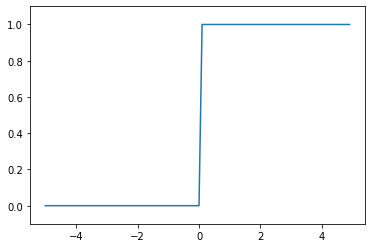

In [161]:
# 3. 계단 함수 그래프
import numpy as np
import matplotlib.pylab as plt

def step_function(x) :
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x) 
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [162]:
# 4. 시그모이드 함수 그래프
def sigmoid(x) :
  return 1 / (1 + np.exp(-x)) 


x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

* numpy의 broadcast : 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라 값의 연산으로 수행하는 것. 

In [163]:
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t) 
print(1.0 / t)

[2. 3. 4.]
[1.         0.5        0.33333333]


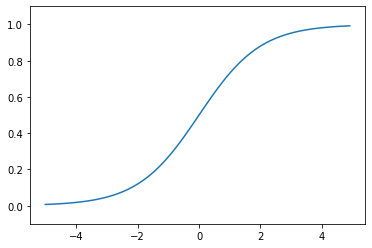

In [164]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

5. 시그모이드 함수와 계단 함수 비교

- 차이점  
시그모이드 함수는 부드러운 곡선이며, 입력에 따라 출력이 연속적으로 변화함. 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버림.  
퍼셉트론에서는 뉴런 사이에 0 또는 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐름. 

* 공통점  
큰 관점에서 보면 두 함수는 같은 모양을 하고 있음. 둘 다 입력이 작을 때 출력은 0에 가깝고(또는 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조임. 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력함. 그리고 함수값은 0과 1 사이 값임. 

6. 비선형 함수

신경망에서는 활성화 함수로 비선형 함수를 사용함. 그 이유는 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문.   
$\rightarrow$ 선형함수의 문제는 층을 아무리 깊게 해도 은닉층이 없는 네트워크로도 똑같은 기능을 할 수 있음. 

7. ReLU 함수  
신경망 분야에서 Sigmoid를 주로 사용했으나 최근에는 ReLU함수를 주로 이용.  
ReLU는 입력이 0을 넘으면 입력을 그대로 출력, 0을 넘지 않으면 0으로 출력. 

In [165]:
# relu 구현
def relu(x) :
  return np.maximum(0, x)

# 3.3 다차원 배열의 계산  
넘파이의 다차원 배열을 사용한 계산법

1. 다차원 배열

In [166]:
# 1차원 배열 

import numpy as np
A = np.array([1, 2, 3, 4])
print(A) 
print(np.ndim(A)) # dimension = 1
print(A.shape) # tuple 반환 

[1 2 3 4]
1
(4,)


In [167]:
# 2차원 배열 

B = np.array([[1, 2], [3, 4], [5, 6]])  # dimension = 2:  matri
print(B)
print(np.ndim(B))
print(B.shape) 

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


2. 행렬의 곱

In [168]:
A = np.array([[1, 2], [3, 4]]) # 2 X 2 
print(A)
print(A.shape)
print("==========================================")
B = np.array([[5, 6], [7, 8]]) # 2 X 2
print(B)
print(B.shape)
np.dot(A, B)  # A %*% B

[[1 2]
 [3 4]]
(2, 2)
[[5 6]
 [7 8]]
(2, 2)


array([[19, 22],
       [43, 50]])

In [169]:
A = np.array([[1, 2, 3], [4, 5, 6]]) # 2 X 3
print(A)
print(A.shape)
print("========================================")
B = np.array([[1, 2], [3, 4], [5, 6]]) # 3 X 2
print(B)
print(B.shape)
np.dot(A, B)  

[[1 2 3]
 [4 5 6]]
(2, 3)
[[1 2]
 [3 4]
 [5 6]]
(3, 2)


array([[22, 28],
       [49, 64]])

In [170]:
A = np.array([[1, 2], [3, 4], [5, 6]])
print(A.shape)
B = np.array([7, 8])
print(B.shape)

print(np.dot(A, B))
print(np.dot(A, B).shape)

(3, 2)
(2,)
[23 53 83]
(3,)


3. 신경망에서의 행렬 곱

In [171]:
X = np.array([1, 2])
print(X.shape)

W = np.array([[1, 3, 5], [2, 4, 6]])
print(W)
print(W.shape)
Y = np.dot(X, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


# 3.4 3층 신경망 구현하기

1. 표기법

$ w_{12}^{(1)} $ : 앞 층의 2번째 뉴런에서 다음 층의 첫 번째 뉴럭으로 향하는 1층의 가중치.  \\
$a_1^{(1)}$ : 은닉층 1층의 첫 번째 뉴런. \\
$b_1^{(1)}$ : (다음 층의 1번으로 가는 1층의) 편향 뉴런   

In [172]:
import numpy as np

# 1층 은닉층 

X = np.array([1.0, 0.5])
W1= np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)
print("=========================")

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [173]:
Z1 = sigmoid(A1)
print(Z1)

[0.57444252 0.66818777 0.75026011]


In [174]:
# 2층 은닉층

W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)  # 1 X 3
print(W2.shape)  # 3 X 2
print(B2.shape)  # 1 X 2

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2) 

(3,)
(3, 2)
(2,)


In [175]:
# 출력층 => 활성화 함수 다름 

def identity_function(x) :
  return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

출력층의 활성화 함수는 풀고자 하는 문제의 성질에 맞게 정함.   
예를 들어, 회귀에는 항등 함수를, 2클래스 분류에는 시그모이드 함수를, 다중 클래스 분류에는 소프트맥스 함수를 사용하는 것이 일반적임. 

3. 구현 정리 

In [176]:
# initialization
def init_network() :
  network = {} # dictionary 생성
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])  # 1층에서의 weight
  network['b1'] = np.array([0.1, 0.2, 0.3]) # 1층에서의 편향 
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])  # 2층에서의 weight
  network['b2'] = np.array([0.1, 0.2]) # 2층에서의 편향 
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]]) # 3층에서의 weight 
  network['b3'] = np.array([0.1, 0.2])

  return network

# neural network process
def forward(network, x) :
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1  # 1 X 3 
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2  # 1 X 2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3  # 1 X 3
  y = identity_function(a3)

  return y

In [177]:
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


# 3.5 출력층 계산하기

신경망은 분류와 회귀에 둘 다 사용될 수 있는데, 이때 활성화 함수가 달라짐.   
일반적으로 회귀에는 항등 함수를, 분류에는 소프트맥스 함수를 사용.

1. soft-max 함수

$$
y_k = \frac{\exp(a_k)}{\sum_{i=1}^n \exp(a_i)}
$$
여기서 $n$은 출력층의 뉴런 수, $y_k$는 그 중 k번 째 출력임을 뜻함. 

In [178]:
# 소프트맥스 함수 구현

a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)
print("=======================================")

sum_exp = np.sum(exp_a)
print(sum_exp)
print("=======================================")

y = exp_a / sum_exp
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [179]:
def softmax(a) :
  exp_a = np.exp(a) 
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

2. 소프트맥스 함수 구현 시 주의점

오버플로 문제. 지수함수는 쉽게 매우 큰 값을 내기 때문에 쉽게 inf가 될 수 있음.이렇게 큰 값으로 나누면 불안정해질 수 있음.  

$$
y_k = \frac{\exp(a_k)}{\sum_{i = 1}^n\exp(a_i)} = ... = \frac{\exp(a_k + C')}{\sum_{i=1}^n(a_i + C')}
$$
여기서 $C'$ 값에 어떤 값을 대입해도 상관없지만, 오버플로를 막을 목적으로는 입력 신호 중 최댓값을 이용하는 것이 일반적. 

In [180]:
# 예시

a = np.array([1010, 1000, 990])
np.exp(a) / np.sum(np.exp(a))  # inf 값이 나오기 때문에 NaN값이 나옴. (Not a number)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


array([nan, nan, nan])

In [181]:
c = np.max(a)
print(a - c)

np.exp(a - c) / np.sum(np.exp(a - c))

[  0 -10 -20]


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [182]:
# 보정된 softmax 함수

def softmax(a) :
  c = np.max(a)
  exp_a = np.exp(a - c)   # c : maximum input
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

3. 소프트맥수 함수의 특징

In [183]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


 * 소프트맥스의 중요한 성질 중 하나는 출력 값들의 합은 총 1이 됨. 때문에 소프트맥스 함수의 출력을 확률로 해석할 수 있음.   
위에서 출력된 값들을 해석해보면, "약 1.8%의 확률로 0번째 클래스, 24.5%의 확률로 1번째 클래스, 그리고 73.7%로 2번째 클래스이다." 라고 할 수 있다.   
즉, 소프트맥스 함수를 이용함으로써 문제를 확률적(통계적)으로 대응할 수 있게 됨.

* 신경망을 이용한 분류에서는 일반적으로 가장 큰 출력을 내는 뉴련에 해당하는 클래스로만 인식.   
소프트맥스 함수를 적용해도 출력이 가장 큰 뉴런의 위치는 달라지지 않음. 따라서 신경망으로 분류할 때는 출력층의 소프트맥스 함수를 생략해도 됨. 

4. 출력층의 뉴런 수 정하기 

* 분류에서는 분류하고 싶은 클래스 수로 뉴런 수를 설정하는 것이 일반적.   
예를 들어 숫자 0~9를 분류하고 싶다면 출력층에 10개의 뉴런을 설정. 

# 3.6 손글씨 숫자 인식

* 기계학습의 문제 풀이는 학습과 추론(inference)의 두 단계를 거쳐 이뤄짐. 학습 단계에서 모델을 학습하고 추론 단계에서 학습한 모델로 미지의 데이터에 대해서 추론을 수행. 

* 여기서는 학습된 매개변수를 사용하여 학습 과정은 생략하고, 추론 과정만 구현.   
이 추론 과정을 신경망의 순전파(forward propagation)라고 함. 

1. MNIST 데이터셋 

* 0부터 9까지의 숫자 이미지로 이루어진 데이터셋. 훈련 이미지가 60,000장, 시험 이미지가 10,000장. 
* 이미지 데이터는 28 X 28 크기의 회색조 이미지 (1채널). 각 픽셀은 0에서 255까지의 값을 취함. 

In [184]:
from google.colab import drive
drive.mount("/content/drive")
# /content/drive/MyDrive/sdmlab/DL/source/dataset/mnist.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
## directory 설정

# os.getcwd()
# os.chdir("C:////")
# os.getcwd()

In [186]:
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정 
from drive.MyDrive.sdmlab.DL.source.dataset.mnist import load_mnist

In [187]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

In [188]:
print(x_train.shape) # 훈련 이미지
print(t_train.shape) # 훈련 레이블 
print(x_test.shape)  # 시험 이미지 
print(t_test.shape)  # 시험 레이블

(60000, 784)
(60000,)
(10000, 784)
(10000,)


* normalize : 입력 이미지의 픽셀값을 0과 1사이의 값으로 정규화할지 정함. 
* flatten : 입력 이미지를 평탄하게, 즉 1차원 배열로 만들지 정함. False로 설정하면  1 X 28 X 28의 3차원 배열로, True로 설정하면 784개의 원소로 이루어진 1차원 배열로 저장. 
* one_hot_label : 레이블을 one-hot encoding 형태로 저장할 지 정함. 

※ pickle \\
프로그램 실행 중에 특정 개체를 파일로 저장하는 기능. 저장해둔 pickle 파일을 로드하면 실행 당시의 객체를 즉시 복원할 수 있음.    
MNIST 데이터셋을 읽는 load_mnist()함수에서도 (2번째 이후의 읽기 시) pickle을 이용. pickle 덕분에 mnist데이터를 순식간에 준비할 수 있음. 

In [189]:
# 이미지 확인 

from PIL import Image

def img_show(img) :
  pil_img = Image.fromarray(np.uint8(img)) 
  # numpy 배열로 저장된 이미지 데이터를 PIL용으로 바꿈. 
  pil_img.show()

img = x_train[0]  # 제일 처음 데이터의 이미지
label = t_train[0]  # 제일 처음 데이터의 레이블 
print(label)

5


In [190]:
print(img.shape)

(784,)


In [191]:
img = img.reshape(28, 28)  # 원래의 픽셀 형태로
print(img.shape)

(28, 28)


In [192]:
img_show(img)  ############ 이거 출력 안 되는데 ############

2. 신경망의 추론 정리 

입력층 뉴런은 784개(28 X 28 = 784이기 때문), 출력층 뉴런은 10개로 신경망을 구성. 첫 번째 은닉층에는 50개의 뉴런, 두 번째 은닉층에는 100개의 뉴런으로 구성. 이는 임의로 설정한 값임. 

In [193]:
# from drive.MyDrive.sdmlab.DL.source.ch03 import neuralnet_mnist
## 요고 해결해야함...... 
# 디렉토리 깔끔하게 하기 !! 

In [194]:
import pickle

def get_data() :
  (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
  return x_test, t_test

def init_network() :
  with open("/content/drive/MyDrive/sdmlab/DL/source/ch03/sample_weight.pkl", "rb") as f:
    network = pickle.load(f)

  return network

def predict(network, x) :
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [195]:
x, t = get_data()             # 데이터셋 불러들이기 
network = init_network()      # initialization

accuracy_cnt = 0
for i in range(len(x)) :
  y = predict(network, x[i])
  p = np.argmax(y)            # 카테고리 확률이 가장 높은 원소의 인덱스
  if p == t[i] :
    accuracy_cnt += 1         # 맞힌 숫자의 수 => accuracy가 됨

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


※ 백색화(whitening) : 전체 데이터를 균일하게 분포시키는 것

3. 배치처리 

In [196]:
# 신경망 각 층의 가중치 형상 출력

x, _ = get_data()   # 저렇게 underbar로 하는 거 뭐지
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']
x.shape

(10000, 784)

In [197]:
x[0].shape  # 첫 번째 데이터의 정보

(784,)

In [198]:
print(W1.shape) # 첫 번째 가중치
print(W2.shape)
print(W3.shape) # 마지막 가중치

(784, 50)
(50, 100)
(100, 10)


배치 처리는 컴퓨터로 계산할 때 큰 이점을 줌. 처리 시간을 대폭 줄여줌. 

In [199]:
# 배치 처리 구현

x, t = get_data()
network = init_network()

batch_size = 100  # 배치 크기 (무슨 배치 크기를 말하는 거지)
accuracy_cnt = 0  # cnt : count약자 

for i in range(0, len(x), batch_size) :
  x_batch = x[i:i+batch_size]  # 100개씩 묶어서 생각함. 
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1)
  accuracy_cnt += np.sum(p == t[i:i+batch_size])

In [200]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [201]:
list(range(0, 10, 3))

[0, 3, 6, 9]

In [202]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6], [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])
y = np.argmax(x, axis = 1)  # 각 행에 대해서 max값 index 찾음.
print(y)

[1 2 1 0]


In [203]:
y = np.array([1, 2, 1, 0])
t = np.array([1, 2, 0, 0])
print(y == t)
np.sum(y == t)  # True count 

[ True  True False  True]


3